In [3]:
# Pull in data and save it to a DataFrame

import pandas as pd

# Replace this with the path to your CSV file
file_path = '/Users/christopherfrye/Downloads/climate_risk.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Define climate text variables
climate_cols = [
    'tran_risk_w_std', 'tran_risk_pro_w_std', 'tran_risk_npro_w_std',
    'phy_risk_acute_w_std', 'phy_risk_chronic_w_std'
]

# Descriptive labels for plotting
climate_labels = {
    'tran_risk_w_std': "Total Transition Risk Mentions",
    'tran_risk_pro_w_std': "Proactive Transition Talk (w/ 'invest', 'develop')",
    'tran_risk_npro_w_std': "Non-Proactive Transition Talk (no action verbs)",
    'phy_risk_acute_w_std': "Acute Physical Risk (hurricanes, floods near 'risk')",
    'phy_risk_chronic_w_std': "Chronic Physical Risk (drought, heat near 'threat')"
}

# Map NAICS industry codes to sector names
def map_naics_code(code):
    if 31 <= code <= 33:
        return "Manufacturing"
    elif 44 <= code <= 45:
        return "Retail Trade"
    elif 48 <= code <= 49:
        return "Transportation and Warehousing"
    return {
        11: "Agriculture, Forestry, Fishing and Hunting",
        21: "Mining, Quarrying, and Oil and Gas Extraction",
        22: "Utilities",
        23: "Construction",
        42: "Wholesale Trade",
        51: "Information",
        52: "Finance and Insurance",
        53: "Real Estate and Rental and Leasing",
        54: "Professional, Scientific, and Technical Services",
        55: "Management of Companies and Enterprises",
        56: "Administrative and Support and Waste Management",
        61: "Educational Services",
        62: "Health Care and Social Assistance",
        71: "Arts, Entertainment, and Recreation",
        72: "Accommodation and Food Services",
        81: "Other Services",
        92: "Public Administration"
    }.get(code, "Other/Unknown")

df['naics_sector'] = df['industry_naics'].astype(int).apply(map_naics_code)

# Display the headers and the first 5 rows of the CSV
print("Headers:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Display summary statistics for each column
print(df.describe())

Headers: ['gvkey', 'capex_m_lag_w', 'roaq_lag_w', 'bk_leverage_lag_w', 'ppe_lag_w', 'logatq_lag_w', 'tobin_q_w', 'qtr', 'tran_risk_w_std', 'tran_risk_pro_w_std', 'tran_risk_npro_w_std', 'phy_risk_acute_w_std', 'phy_risk_chronic_w_std', 'ticker', 'company_name', 'industry_naics', 'naics_sector']

First few rows:
   gvkey  capex_m_lag_w  roaq_lag_w  bk_leverage_lag_w  ppe_lag_w  \
0   1004       0.775370    0.091727           0.285182   0.177044   
1   1004       2.169838    0.032214           0.101650   0.194719   
2   1004       0.990099    0.029251           0.116016   0.191637   
3   1045      12.023182    0.150515           0.409038   0.527381   
4   1045       3.219026    0.171135           0.404714   0.514223   

   logatq_lag_w  tobin_q_w  qtr  tran_risk_w_std  tran_risk_pro_w_std  \
0      7.708725   1.042455    1         0.000000                  0.0   
1      7.323171   0.934373    3         0.000000                  0.0   
2      7.344202   0.930979    4         0.000000     


OLS Regression (Basic):

                            OLS Regression Results                            
Dep. Variable:              tobin_q_w   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     122.9
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          1.33e-172
Time:                        15:33:57   Log-Likelihood:                -16004.
No. Observations:                8445   AIC:                         3.202e+04
Df Residuals:                    8437   BIC:                         3.208e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
co

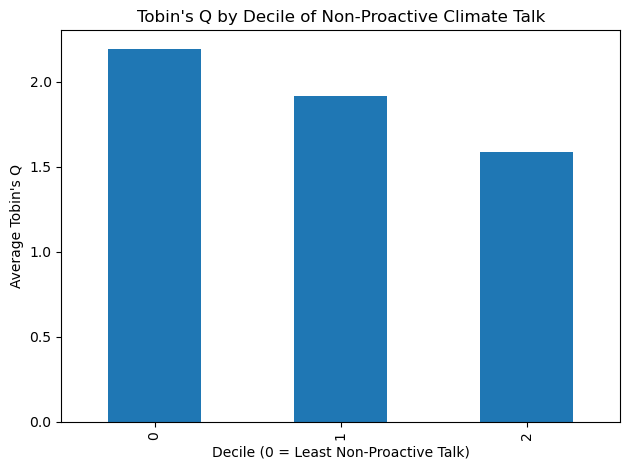


OLS Regression (Outlier Analysis — Tobin's Q within 1st–99th percentiles):

                            OLS Regression Results                            
Dep. Variable:              tobin_q_w   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          2.36e-188
Time:                        15:33:57   Log-Likelihood:                -13732.
No. Observations:                8275   AIC:                         2.748e+04
Df Residuals:                    8267   BIC:                         2.754e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

,Sector,NPro_Coeff,P_Value,N
11,Health Care and Social Assistance,-0.883446,0.270435,151
12,Accommodation and Food Services,-0.522334,0.549085,176
1,Transportation and Warehousing,-0.152740,0.236586,262
0,Wholesale Trade,-0.144483,0.087569,255
6,Real Estate and Rental and Leasing,-0.139809,0.433620,213
4,Finance and Insurance,-0.132574,0.093835,1095
2,Manufacturing,-0.132444,0.000107,3373
10,"Professional, Scientific, and Technical Services",-0.104640,0.313918,335
9,Retail Trade,-0.039368,0.560810,449
5,"Mining, Quarrying, and Oil and Gas Extraction",-0.023033,0.205975,418


In [12]:
# 1) Basic Regression - Tobin's Q vs Climate Talk

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define predictors and target
X = df[[
    'tran_risk_pro_w_std', 
    'tran_risk_npro_w_std', 
    'phy_risk_acute_w_std', 
    'phy_risk_chronic_w_std',
    'roaq_lag_w',                # Profitability
    'logatq_lag_w',              # Size
    'bk_leverage_lag_w'         # Leverage
]]
y = df['tobin_q_w']

# Drop rows with missing values
X = X.dropna()
y = y.loc[X.index]

# Add constant and run regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nOLS Regression (Basic):\n")
print(model.summary())

# 2) Bucket Analysis - Valuation across Climate Talk Tiers

# Create decile buckets for non-proactive climate talk, allowing dropped bins
df['npro_bucket'] = pd.qcut(df['tran_risk_npro_w_std'], 10, labels=False, duplicates='drop')

# Average Tobin's Q per bucket
bucket_q = df.groupby('npro_bucket')['tobin_q_w'].mean()

# Plot
bucket_q.plot(kind='bar')
plt.title("Tobin's Q by Decile of Non-Proactive Climate Talk")
plt.xlabel("Decile (0 = Least Non-Proactive Talk)")
plt.ylabel("Average Tobin's Q")
plt.tight_layout()
plt.show()

# 3) Outlier Analysis - Is a Small Group Driving the Effect?

# Re-run regression without top/bottom 1% of Tobin’s Q
q_low, q_high = df['tobin_q_w'].quantile([0.01, 0.99])
df_no_outliers = df[(df['tobin_q_w'] >= q_low) & (df['tobin_q_w'] <= q_high)]

# Same regression with controls
X_out = df_no_outliers[[
    'tran_risk_pro_w_std', 
    'tran_risk_npro_w_std', 
    'phy_risk_acute_w_std', 
    'phy_risk_chronic_w_std',
    'roaq_lag_w', 
    'logatq_lag_w', 
    'bk_leverage_lag_w'
]]
y_out = df_no_outliers['tobin_q_w']

# Drop missing values and align
X_out = X_out.dropna()
y_out = y_out.loc[X_out.index]
X_out = sm.add_constant(X_out)

# Run and display regression
model_out = sm.OLS(y_out, X_out).fit()
print("\nOLS Regression (Outlier Analysis — Tobin's Q within 1st–99th percentiles):\n")
print(model_out.summary())

# 4) Sector-Level Regression Loop

sector_results = []

for sector in df['naics_sector'].dropna().unique():
    subset = df[df['naics_sector'] == sector].copy()

    # Drop rows with any missing data in predictors or target
    cols_needed = [
        'tran_risk_pro_w_std', 
        'tran_risk_npro_w_std',
        'roaq_lag_w', 
        'logatq_lag_w', 
        'bk_leverage_lag_w', 
        'tobin_q_w'
    ]
    subset = subset.dropna(subset=cols_needed)

    if len(subset) > 100:
        X_sec = subset[[
            'tran_risk_pro_w_std', 
            'tran_risk_npro_w_std',
            'roaq_lag_w', 
            'logatq_lag_w', 
            'bk_leverage_lag_w'
        ]]
        y_sec = subset['tobin_q_w']

        X_sec = sm.add_constant(X_sec)

        model_sec = sm.OLS(y_sec, X_sec).fit()
        coef = model_sec.params.get('tran_risk_npro_w_std', None)
        pval = model_sec.pvalues.get('tran_risk_npro_w_std', None)
        sector_results.append((sector, coef, pval, len(subset)))

# Format and display results
results_df = pd.DataFrame(sector_results, columns=["Sector", "NPro_Coeff", "P_Value", "N"])
results_df = results_df.sort_values("NPro_Coeff")

from IPython.display import display
display(results_df)
